In [1]:
from IPython.display import Image

# Analysis of Solar Panel Efficiency

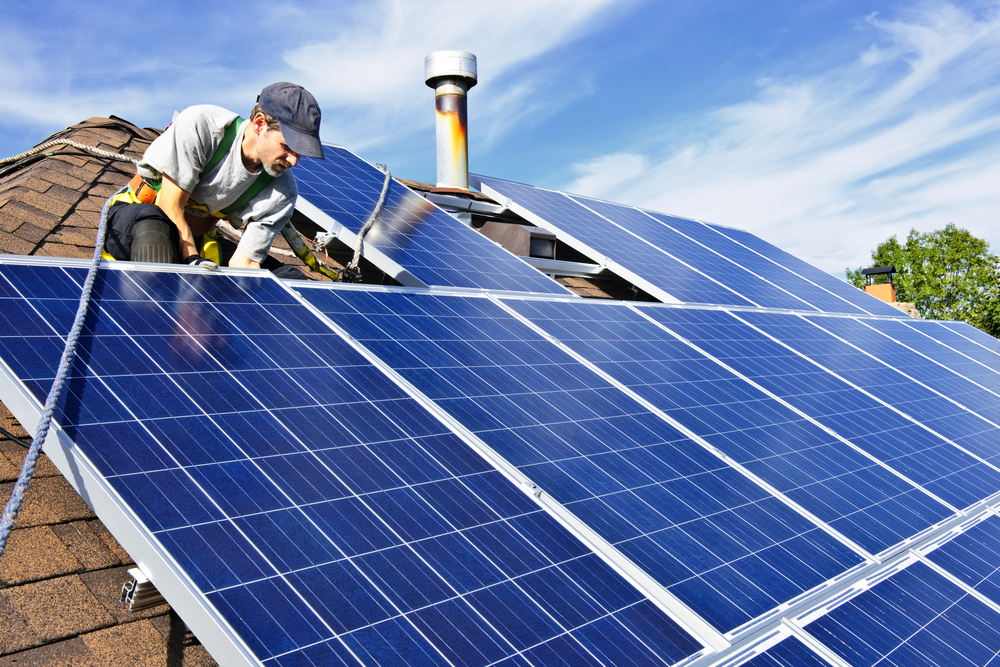

In [2]:
Image("Solar.jpg")



## Research Question:

- Can we accurately predict solar panel efficiency from the weather?

## Step 1: Getting Data

- Energy production data(csv) single daily recording.
- Weather data (api/json) multiple readings per day (https://api.synopticlabs.org)
- Sunrise/Sunset(api/json) (https://api.sunrise-sunset.org) 



In [3]:
import pandas as pd

pd.read_csv("Energy.csv").head(2)

,Date/Time,Energy Produced (Wh),Year,Month,Day,Date
0,2013-10-14 00:00:00 -0700,2032,2013,10,14,20131014
1,2013-10-15 00:00:00 -0700,29353,2013,10,15,20131015


In [4]:
pd.read_csv("Weather.csv").head(5)

,air_temp_set_1,date_time,pressure_set_1d,relative_humidity_set_1,weather_condition_set_1d,wind_speed_set_1
0,14.4,Y2013M10D14H00M51,99775.27,77.94,Partly Cloudy,4.63
1,12.0,Y2013M10D14H01M43,99841.78,87.57,Mostly Cloudy,1.54
2,12.2,Y2013M10D14H01M51,99841.78,86.42,Mostly Cloudy,3.09
3,12.2,Y2013M10D14H02M51,99875.05,89.96,Overcast,0.00
4,12.8,Y2013M10D14H03M51,99908.31,86.49,Overcast,0.00


In [5]:
pd.read_csv("Daytimes.csv").head(2)

,day_length,sunrise,sunset
0,40786,2013-10-14T14:07:35+00:00,2013-10-15T01:27:21+00:00
1,40660,2013-10-15T14:08:25+00:00,2013-10-16T01:26:05+00:00


## Step2: Cleaning the data

Filtering:
- Make time stamps uniform across datasets and convert to Pacific Time. Otherwise sunrise and sunset times were on different dates.
- Filter weather data to only daytime values




Aggregating:

_Quantitative Data_
- Take the mean of daily measurements for quantitative variables.

_Categorical Data_
- Categorical variable of "Weather Condition" aggregated two ways:
    - Most common Weather Condition for that day
    - For each weather type create column representing the percentage amount of the day that was assigned that weather type.

In [6]:
pd.read_csv("cleaned_data.csv")[["Date", "Weather_overall", "pct_Clear"]].head(10)

,Date,Weather_overall,pct_Clear
0,2013-10-15,Clear,100.000000
1,2013-10-16,Clear,100.000000
2,2013-10-17,Clear,100.000000
3,2013-10-18,Clear,100.000000
4,2013-10-19,Clear,57.142857
5,2013-10-20,Haze,22.222222
6,2013-10-21,Fog,28.571429
7,2013-10-22,Haze,21.428571
8,2013-10-23,Haze,NaN
9,2013-10-24,Haze,15.384615


## Step 3: Exploring the Data

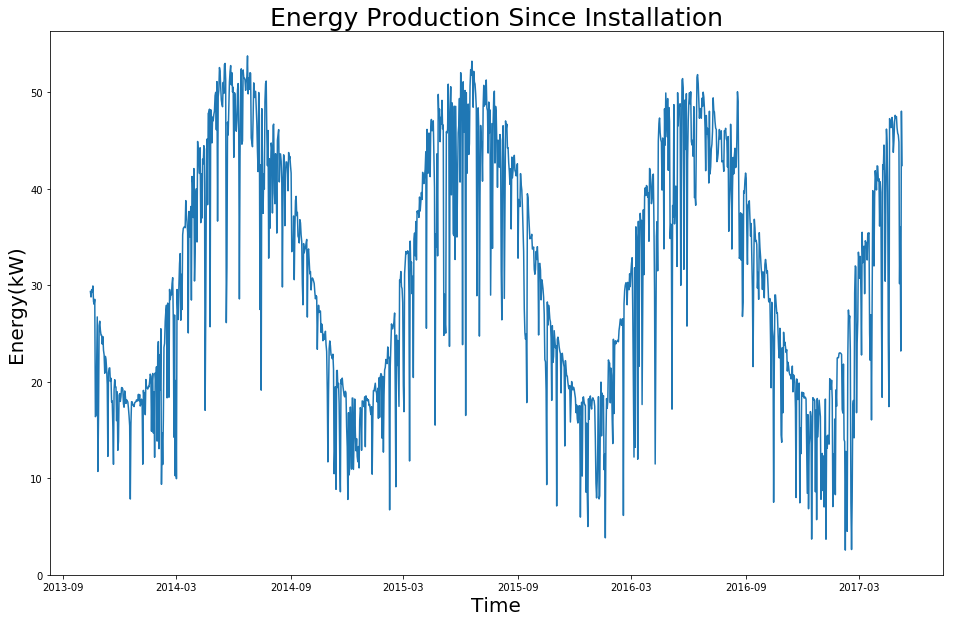

In [7]:
Image("EnergyLifetime.png", unconfined=True)

## Assume Three Factors Determine Efficiency
- It seems that the time of year has a significant effect on the production.
- The production trends slightly downward at the years go by. This is possibly due to system age.
- There are many low spikes that seem to not be closly linked with the season.



## Controling for season and age.

From the first graph it seems that the seasonal effect is sinusoidal while the aging affect is linear(According to the manufacturer of our panels, the panels lose 20% of there efficiency after 25 years). There for we can construct a linear equation for energy production as follows:

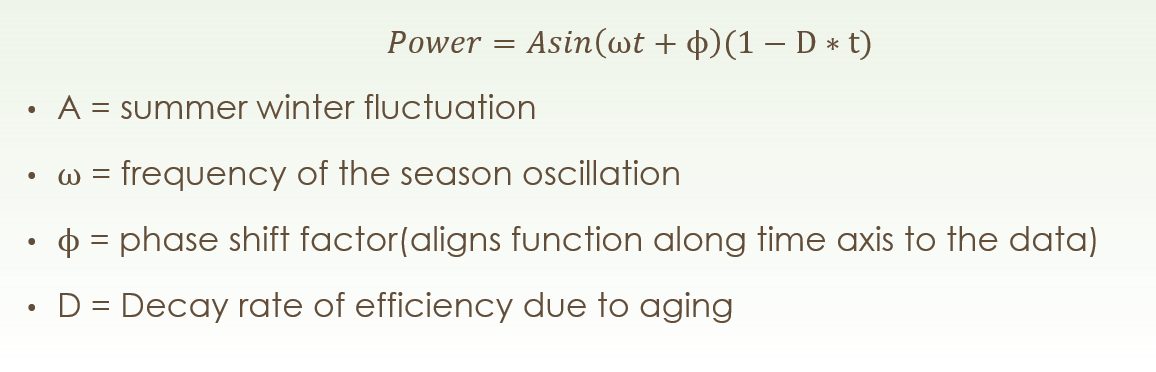

In [8]:
Image("Equation.PNG")

In [9]:
import scipy.optimize
import pandas as pd
import numpy as np
data = pd.read_csv("cleaned_data.csv")
data.reset_index(inplace = True)

#seed values fo fmin search
phase_offset = np.pi /0.88
Amplitude = 18000.00
DC_shift = 32747.88298
seed = [Amplitude, phase_offset, DC_shift]

#Define minimization function
season = lambda x: sum(np.sqrt((data["Energy Produced (Wh)"] - ((x[0] *np.sin(((2*np.pi)/365)*data["index"] + x[1]))
                                                                + x[2])* (1-(.2/9125)*data["index"]))**2))

#Find best values for Amplitude, phase_offset, and DC_shift
Xu = scipy.optimize.fmin(func=season, x0=seed, maxiter=100000)

#Store the projected Constant weather production values.
data["model"] = ((Xu[0] *np.sin(((2*np.pi)/365)*data["index"] + Xu[1])) + Xu[2])* (1-(.2/9125)*data["index"])
Xu

Optimization terminated successfully.
         Current function value: 4891956.025264
         Iterations: 194
         Function evaluations: 362


array([  1.64893543e+04,   3.60263323e+00,   3.44070218e+04])

## Fit this theroetical function to the data using fmin search:

- Models the production if weather was held constant: 

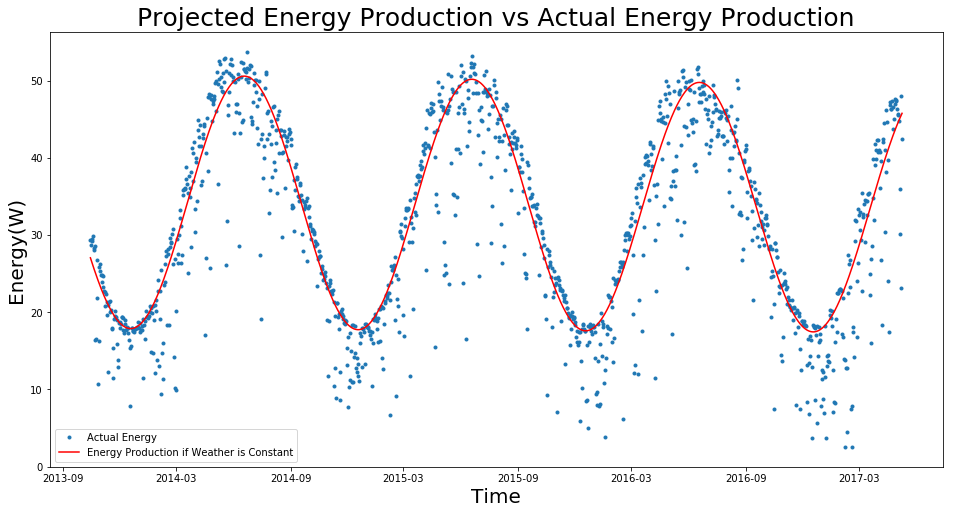

In [10]:
Image("DatawithPredicted.png", unconfined=True)

## Measuring Efficiency

Take the ratio of actual energy production over projected energy production:  

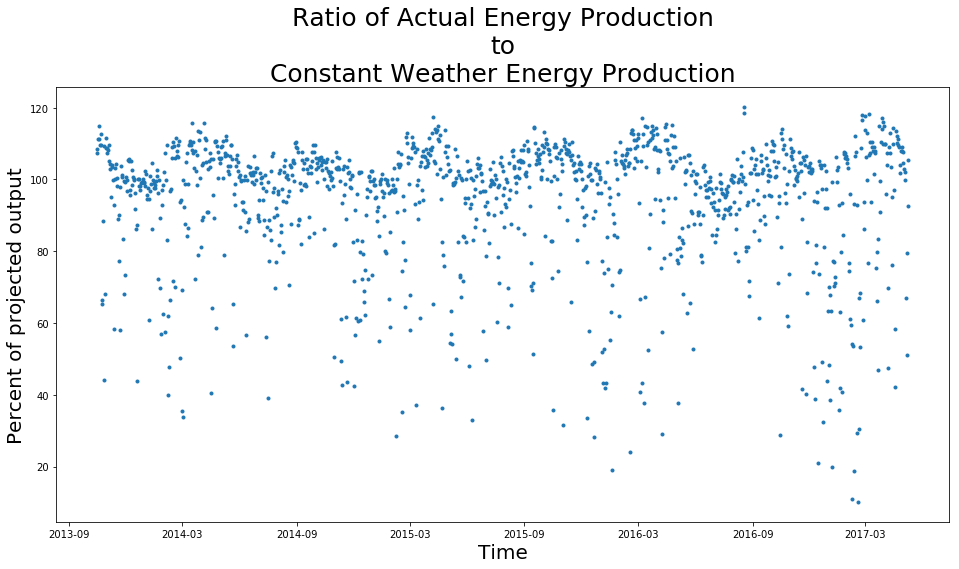

In [11]:
Image("StdData.png", unconfined=True)

# Trends in Energy Efficiency Based in Weather Type

Now that we have an idea of what the energy production would be like if the weather did not change we can begin to explore the efficiency trends associated with specific weather conditions.  

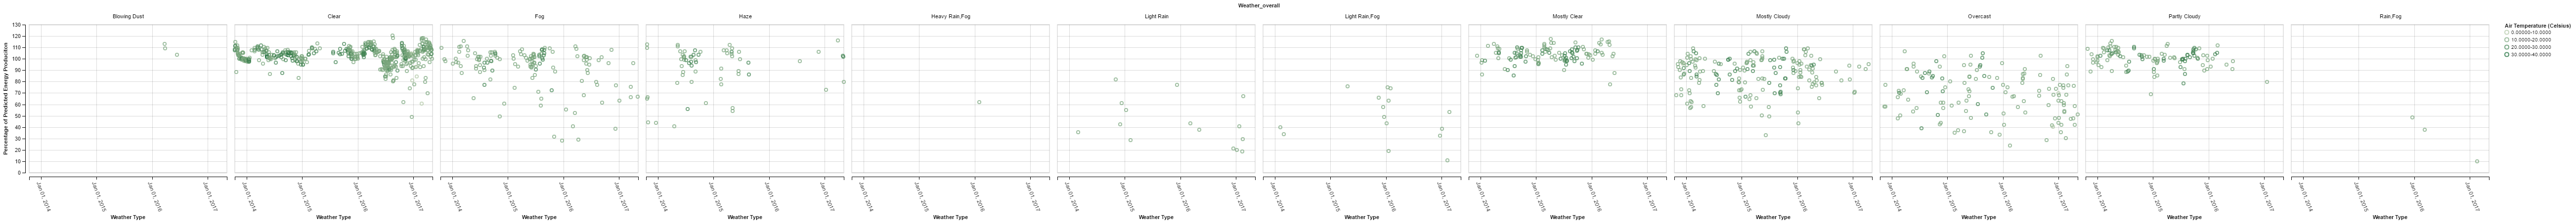

In [12]:
Image("Efficiency by Weather type.png", unconfined=True)

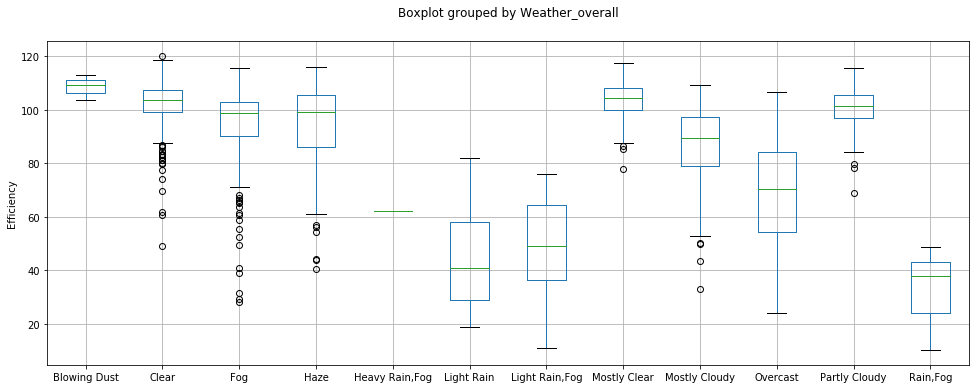

In [13]:
Image("Boxplots.png", unconfined=True)

## Efficiency vs Quantitative Weather measurements:

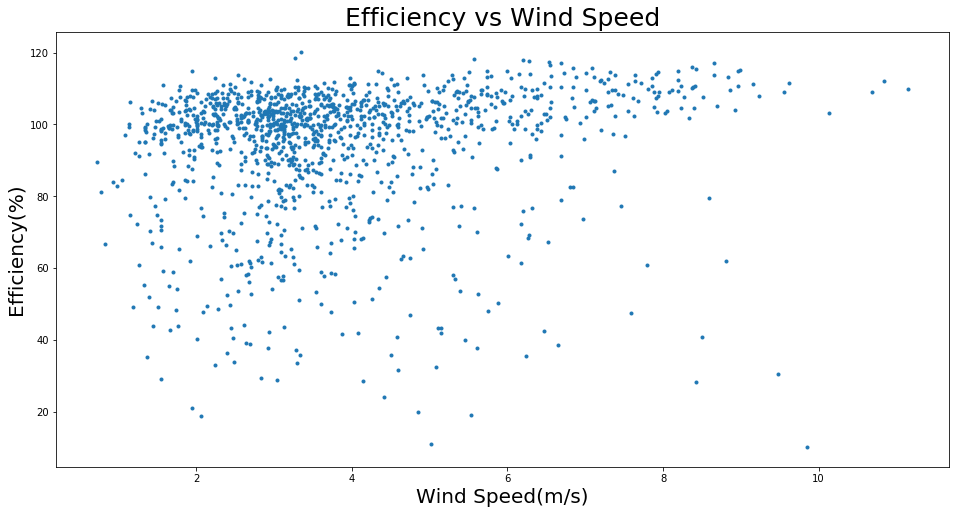

In [14]:
Image("WindSpeed.png", unconfined=True)

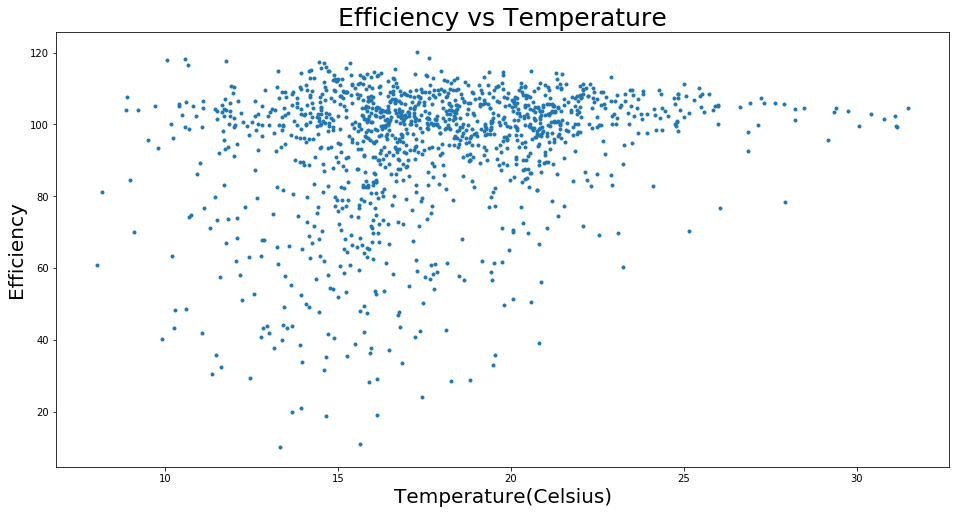

In [15]:
Image("Temp.png", unconfined=True)

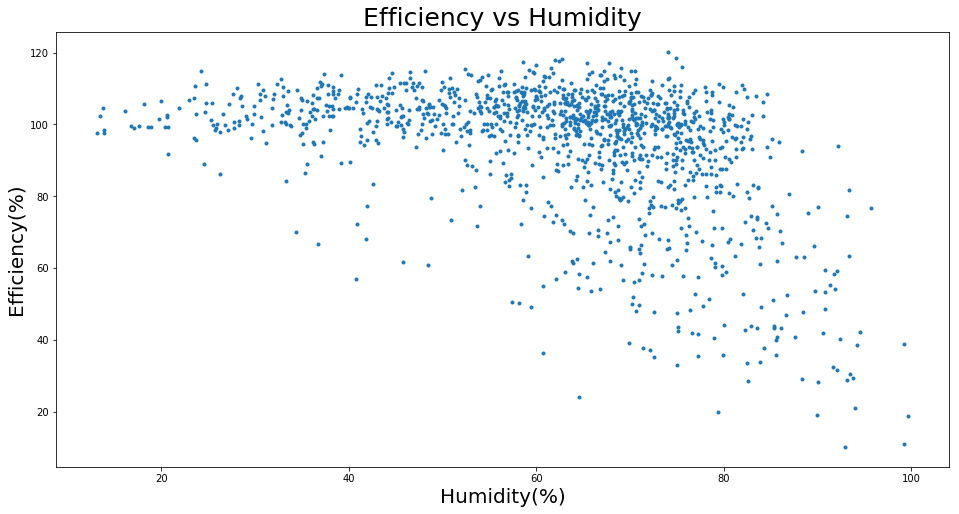

In [16]:
Image("Humidity.png", unconfined=True)

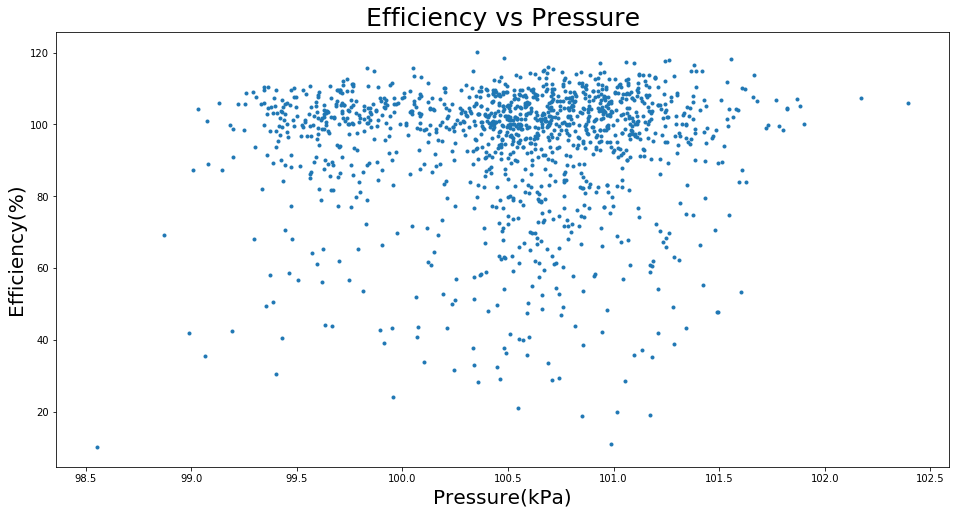

In [17]:
Image("Pressure.png")

## Predicting Efficiency

- KNearestNeighbors
- Polynomial Linear Regression
- Random Forest Regression

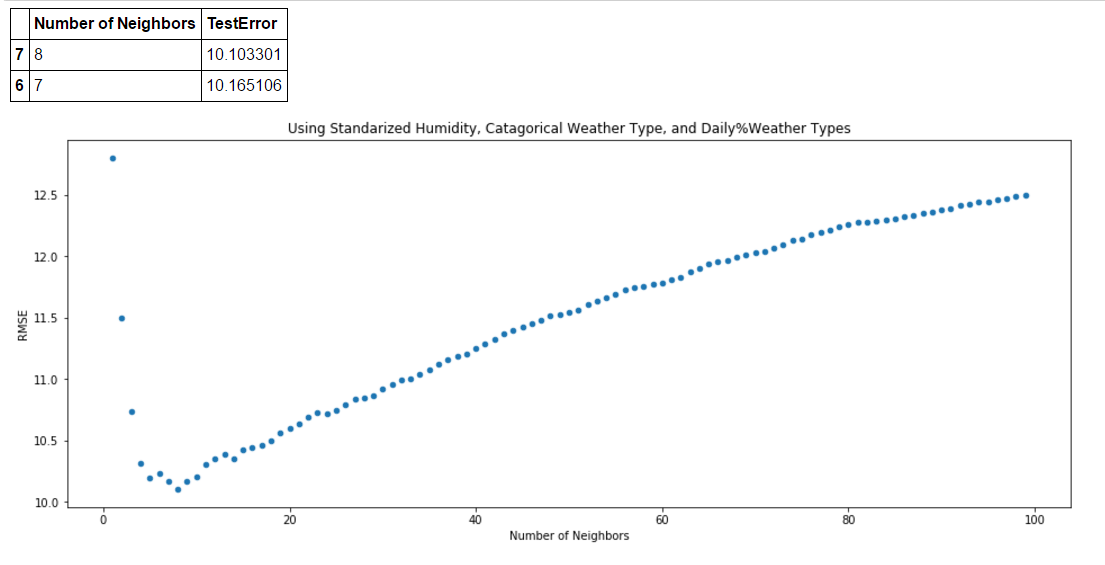

In [18]:
Image("KNearest.PNG")

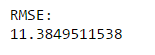

In [19]:
Image("Linear Regression.PNG")

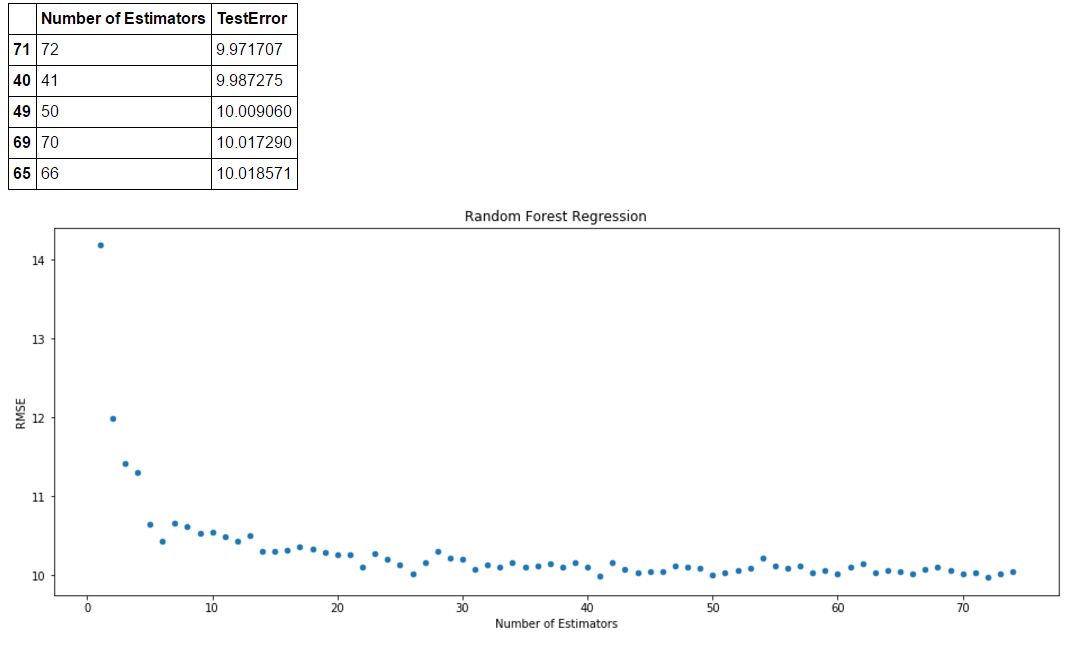

In [20]:
Image("RandomForestRegression.PNG")

# Questions?

.

.

.

.

.